# Градиентрый спуск

## Основная часть

__Задача 1. (всего 5 баллов)__ Рассмотрим следуюущую задачу оптимизации:

\begin{equation}
\min_{x \in \mathbb{R}^d} \left[f(x) := \tfrac{1}{2} x^T A x - b^T x\right],
\end{equation}
где $A \in \mathbb{R}^{d \times d}$, такая, что $A + A^T$ - положительно определенная матрица, $b \in \mathbb{R}^d$.

__а). (0.5 балла)__ Докажите, что константа сильной выпуклости для этой задачи $\mu = \frac{1}{2} \lambda_{\min} \left(A + A^T\right)$, где $\lambda_{\min}(A)$ - минимальное собственное значение матрицы $A$.

__Ваше решение__

Функция сильно выпукла тогда и только тогда, когда 

$$\nabla^2 f(x) \geq \mu I$$

Найдём Гессиан

$$\nabla f(x) = \frac{1}{2} (A + A^T) x - b$$
$$\nabla^2 f(x) = \frac{1}{2} (A + A^T)$$

Критерий выпуклости принимает вид

$$\frac{1}{2} (A + A^T) \geq \mu I$$

Это и значит, что

$$\frac{1}{2} \lambda_{\min} \left(A + A^T\right) = \mu$$

__б). (0.5 балла)__ Докажите, что константа Липшица для данной задачи $L = \frac{1}{2}\lambda_{\max}\left(A + A^T\right)$, где $\lambda_{max}(A)$ - максимально собственное значние матрицы $A$.

__Ваше решение__

Функция гладкая с константой L, если

$$\|\nabla f(x) - \nabla f(y)\| \leq L \|x - y\|$$

для любых $x, y$. Левая часть:

$$\|\nabla f(x) - \nabla f(y)\| = \|\frac{1}{2} (A + A^T) (x - y)\|$$

Используя определение операторной нормы, перейдём к произведению норм:

$$\frac{1}{2} \|A + A^T\| \|x - y\|$$

$A + A^T$ симметричная, поэтому её норма равна максимальному собственному значению. В итоге

$$\|\nabla f(x) - \nabla f(y)\| = \frac{1}{2} \lambda_{\max}(A + A^T) \|x - y\|$$

Значит,

$$\frac{1}{2}\lambda_{\max}\left(A + A^T\right) = L$$

__в). (1 балл)__ Предложите способ генерации матрицы $А$ так, чтобы $f$ была сильно выпуклой, а также можно было задавать и менять $d, \mu, L$. Докажите, что способ корректен. 

_Hint:_ Диагональная матрица даст только 0.25 балла в данном пункте.

__Ваше решение__

Для выполнения необходимых условий матрица $A$ должна быть положительно определённой. Если сделать её симметричной, то из двух предыдущих пунктов видно, что её минимальное и максимальное собственные значения должны быть равны, соответственно, $\mu$ и $L$. Такую матрицу можно представить в виде $Q D Q^T$, где $Q$ - ортогональная, а $D$ - диагональная с такими же условиями на собственные значения. Ортогональную матрицу можно получить, сгенерировав случайную матрицу, а затем применив к ней QR-разложение.

In [21]:
#Ваше решение

import numpy as np

def generate_matrix(d, mu, L, random_seed=5):
    np.random.seed(random_seed)
    temp = np.random.randn(d, d)
    Q, _ = np.linalg.qr(temp)
    D = np.diag(np.linspace(mu, L, d)) # значения меняются от mu до L
    return Q @ D @ Q.T

# убедимся, что собственные значения удовлетворяют условиям

A = generate_matrix(25, 10, 100)
print(np.linalg.eigvalsh(A).max(), np.linalg.eigvalsh(A).min())

100.00000000000004 10.000000000000009


__г). (0.5 балла)__  Реализуйте метод градиетного спуска:
\begin{equation}
x_{k+1} = x_k - \gamma_k \nabla f(x_k),
\end{equation}
для квадратичной функции с матрицей, которую сгенерировали выше, и произвольным ненулевым вектором $b$.

Используйте предложенную функцию для реализации алгоритма и допишите недостающие фрагменты. После чего для проверки загрузите функцию в [контест](https://contest.yandex.ru/contest/66540/enter/).

In [13]:
from tqdm.autonotebook import tqdm
import numpy as np

def GradientDescent(grad, criterion, x_0, eps, max_iter, **params):

    '''
       grad(x) - функция, которая считает градиент целевой функции;
       criterion(x) - функция, которая считает критерий;
       x_0 - начальная точка;
       eps - точность сходимости (обычно 1e-8);
       max_iter - количество итераций;
       **params - содержит именнованные гиперпараметры метода:
           params['gamma'](k) - шаг, зависящий от номера итерации.
    '''

    errors = []

    x_k = np.copy(x_0)
    err_x_0 = criterion(x_k)
    errors.append(criterion(x_k) / err_x_0)
    for k in tqdm(range(max_iter)):

        # your code
        x_k = x_k - params['gamma'](k) * grad(x_k)

        errors.append(criterion(x_k) / err_x_0)
        if errors[-1] < eps:
            break

    return x_k, errors

In [12]:
#ваше решение
def grad(x):
    # матрица симметричная, поэтому формула для градиента упростилась
    return A @ x - b

def criterion(x):
    return np.linalg.norm(grad(x))**2

__д). (0.5 балла)__ Для задачи с $d = 50$, $\mu = 1$ и $L = 100$ найдите точное решение $x^*$ - выпишите формулу для решения в явном виде, а затем, реализуйте, например, с помощью пакетов линейной алгебры (есть встроенный в numpy).

__Ваше решение__

$f$ сильно выпукла, поэтому решением является точка, в которой градиент равен нулю:

$$A x^* - b = 0$$
$$x^* = A^{-1} b$$

In [28]:
#ваше решение
d = 50
mu = 1
L = 100
A = generate_matrix(d, mu, L, random_seed=100)
b = np.random.randn(d)

solution = np.linalg.inv(A) @ b
print(f'Решение: \n{solution}')

Решение: 
[ 0.13001812  0.16974283  0.30219218 -0.2658369  -0.08207401 -0.00356984
 -0.00993606  0.13151133 -0.01338364 -0.1150408  -0.03912313 -0.05083857
  0.08100949  0.03807889  0.02596015 -0.10476754 -0.03660973  0.00222713
  0.04413858  0.01872033 -0.0023586   0.04816641 -0.17322237 -0.02341772
 -0.03788313 -0.05988556 -0.09730684 -0.07328897  0.05156076  0.04358943
  0.27960598 -0.13456969  0.06446355  0.05591246  0.03435202 -0.16669728
  0.01063718  0.17328461  0.08605434 -0.1006582   0.00811302  0.04718274
  0.05293216  0.03138612  0.0290842  -0.05033857  0.039847   -0.07023285
  0.10176153 -0.01287663]


__е). (1.5 балл)__ Запустите градиентный спуск на $10^3$ итераций с шагом $\gamma_k = \tfrac{1}{L}$ и произвольной начальной точкой $x^0$ (если $b$ ненулевой, то можно взять нулевой $x^0$). Проверьте сходится ли он. В качестве критерия сходимости используйте $\| x_k - x^*\|^2_2$. Постройте график сходимости:
- по оси абцисс - номер итерации, по ординат - значения критерия на этой итерации.

Следите за оформлением графиков: размер графика, масштаб осей (обычный или логарифмический), подписи осей (в том числе размер), легенда (если на графике не одна линия), толщина линий и т.д.. Графики должны быть удобны для чтения.

  0%|          | 0/1000 [00:00<?, ?it/s]

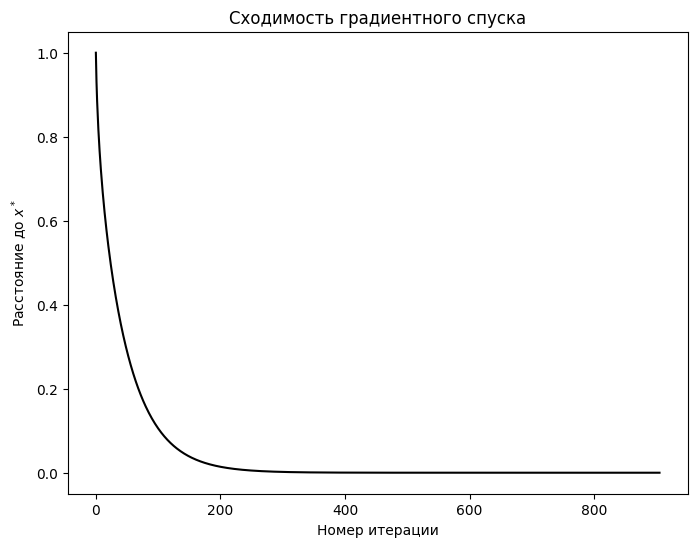

In [50]:
#ваше решение
def criterion(x):
    return np.linalg.norm(x - solution)**2

import matplotlib.pyplot as plt

iterations = 1000
epsilon = 1e-8
g = 1 / L
x_0 = np.zeros(d)
x_k, errors = GradientDescent(grad, criterion, x_0, epsilon, iterations, gamma=lambda k: g)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(errors, color='black')
ax.set_xlabel('Номер итерации')
ax.set_ylabel('Расстояние до $x^*$')
ax.set_title('Сходимость градиентного спуска')
plt.show()

Аналогично предыдущему пункту постройте график сходимости, на котором 
- по оси абцисс - номер итерации, по ординат - логарифм значения критерия на этой итерации.

Следите за оформлением графиков: размер графика, масштаб осей (обычный или логарифмический), подписи осей (в том числе размер), легенда (если на графике не одна линия), толщина линий и т.д.. Графики должны быть удобны для чтения.

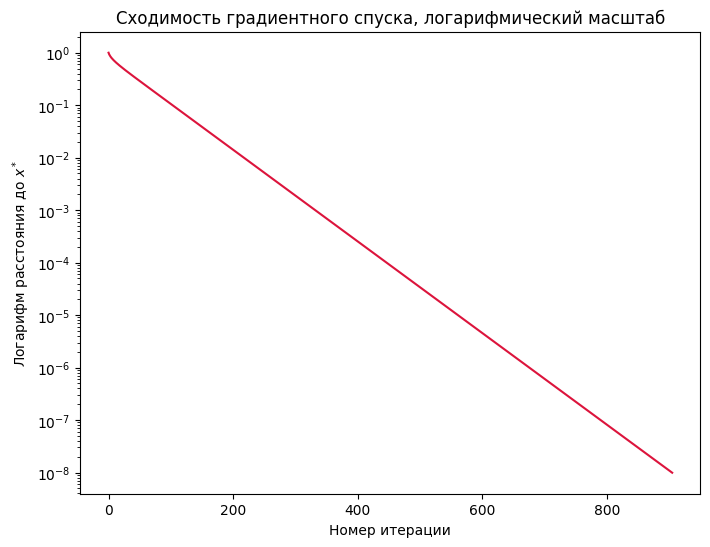

In [51]:
#ваше решение
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(errors, color='crimson')
ax.set_yscale('log')
ax.set_xlabel('Номер итерации')
ax.set_ylabel('Логарифм расстояния до $x^*$')
ax.set_title('Сходимость градиентного спуска, логарифмический масштаб')
plt.show()

Сделайте вывод о характере сходимости.

__Ваше решение__

Сходимость линейная, что видно из второго графика.

__ж). (0.5 балла)__ Добавьте на оба графика теоретическую сходимость, полученную на лекции. Добавьте легенду, чтобы можно было отличить, какой график за что отвечает. 

Сравните со сходимостью, полученной в прошлом пункте, и объясните результат.

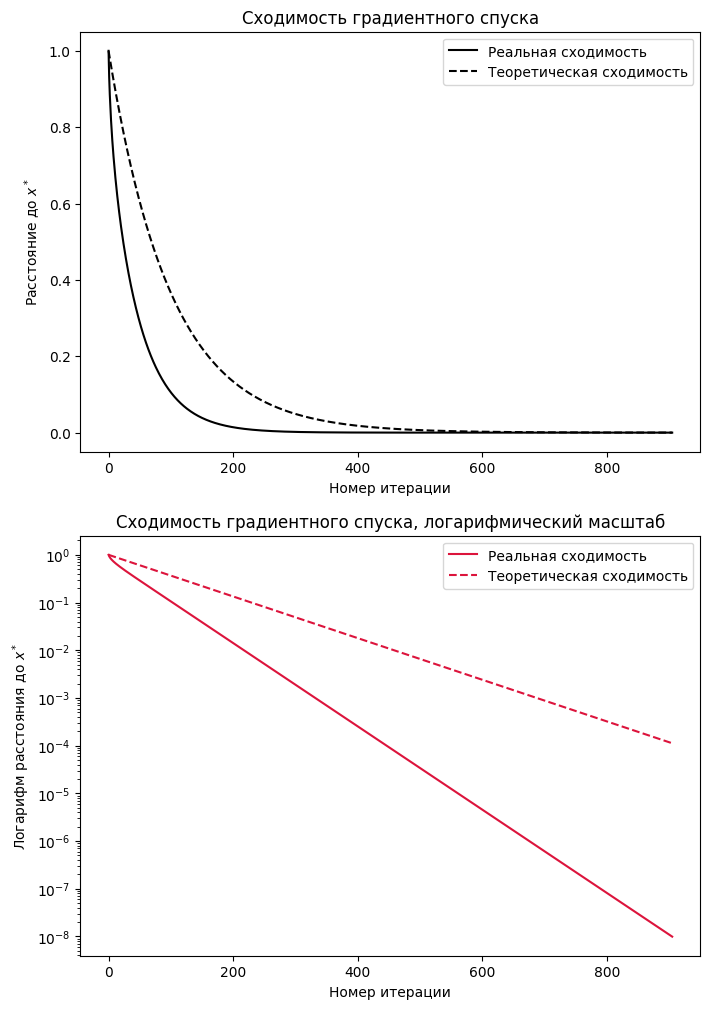

In [58]:
#ваше решение
fig, ax = plt.subplots(2, 1, figsize=(8, 12))

ax[0].plot(errors, color='black', label='Реальная сходимость')
ax[0].plot([errors[0] * (1 - 1 / L) ** i for i in range(len(errors))], color='black', linestyle='dashed', label='Теоретическая сходимость')
ax[0].set_xlabel('Номер итерации')
ax[0].set_ylabel('Расстояние до $x^*$')
ax[0].set_title('Сходимость градиентного спуска')
ax[0].legend()

ax[1].plot(errors, color='crimson', label='Реальная сходимость')
ax[1].plot([errors[0] * (1 - 1 / L) ** i for i in range(len(errors))], color='crimson', linestyle='dashed', label='Теоретическая сходимость')
ax[1].set_yscale('log')
ax[1].set_xlabel('Номер итерации')
ax[1].set_ylabel('Логарифм расстояния до $x^*$')
ax[1].set_title('Сходимость градиентного спуска, логарифмический масштаб')
ax[1].legend()

__Ваше решение__

Реальная сходимость линейная, что соответствует теории. Теоретическая сходимость - оценка сверху, на практике метод сходится быстрее, то есть график реального расстояния лежит ниже теоретического.

## Дополнительная часть

__Задача 2. (всего 5 баллов)__ Исследуйте другие способы подбора шага:

__а). (0.75 балла)__ Попробуйте метод с разными шагами (но постоянными в одном запуске) $\gamma_k = \gamma$. Проверьте диапозон от $0$ до $3/L$, а также $\gamma = \frac{2}{\mu + L}$ Нанесите все новые запуски на график (теоретическую сходимость можно убрать). На каком шаге получен наибыстрейший результат? Как думаете почему?

In [8]:
#ваше решение

__Ваше решение__

__б). (0.75 балла)__ Уменьшающийся с номером итерации шаг: $\gamma_k = \frac{\gamma}{\delta + k}$ или $\gamma_k = \frac{\gamma}{\delta + \sqrt{k}}$, где $\gamma$ и $\delta$ нужно подобрать отдельно. Какая конфигурация $\gamma$ и $\delta$ показала наилучший результат?

In [9]:
#ваше решение

__Ваше решение__

__в). (1.5 балла)__ Наискорейший спуск: $\gamma_k = \arg\min_{\gamma} f(x_k - \gamma \nabla f(x_k))$. Как будете вычислять значение $\gamma_k$ в данном случае?

_Hint: является ли одномерная задача на $\gamma$ выпуклой? Является ли выпуклая функция унимодальной?_

__Ваше решение__

In [10]:
#ваше решение

__Ваше решение__

__г). (0.75 балла)__ Шаг Поляка-Шора: $\gamma_k = \tfrac{f(x^k) - f(x^*)}{\alpha \|\nabla f(x^k)\|^2_2}$, где $\alpha \geq 1$ нужно подобрать отдельно. Какое $\alpha$ дало лучший результат?

In [11]:
#ваше решение

__Ваше решение__

__д). (1.25 балла)__ Сравните все указанные выше подходы подбора шага между собой (в том числе из основной части).
Для этого постройте график сходимости, где 
- по оси абцисс - номер итерации, по ординат - логарифм значения критерия

In [12]:
#ваше решение

Аналогично предыдущему пункту постройте график, где
- по оси абцисс - время от начала старта алгоритма, по ординат - логарифм значения критерия

In [13]:
#ваше решение

При какой из техник подбора шага градиентный спуск сходится быстрее по итерационной сложности?

Какая техника подбора шага показала наилучший результат с вычислительной стороны (по времени работы алгоритма)?

__Ваше решение__